# Starting Question

### If you find a dataset with more features than data points, is there problem with using all the features in a model?

## Aims:

#### 1. Understand the problem with using too many features to train a model (curse of dimensionality)
#### 2. Understand principal component analysis (PCA)
#### 3. Know how to use PCA to reduce the amount of features


### Question: In general, how does the performance on a test set change as the model has more features? 

## Hughes Phenomenon and Overfitting
With a fixed number of training samples, the predictive power of a classifier or regressor first increases as number of dimensions/features used is increased but then decreases.

Ref: https://en.wikipedia.org/wiki/Curse_of_dimensionality

![](https://www.visiondummy.com/wp-content/uploads/2014/04/dimensionality_vs_performance.png)


### Question: As the number of dimensions increases what happens to the number of observations needed to cover that space?

## The Curse of Dimensionality and Overfitting

As the dimensionality of the feature space increases, the number of configurations can grow exponentially, and the number of configurations covered by an observation decreases. 

As we add more dimensions we also increase the processing power we need to analyze the data, and we also increase the amount of training data required to make meaningful models.

Ref: https://towardsdatascience.com/curse-of-dimensionality-2092410f3d27

### 1-d Space

![1d](https://cdn-images-1.medium.com/max/1600/1*V4g_LzDA0QhWrVbRJqSNLQ.png)

### 2d Space
![2d](https://cdn-images-1.medium.com/max/1600/1*m5i7BqDLiZ8t1tyQx8xWHQ.png)

### 3d Space

![3d](https://cdn-images-1.medium.com/max/1600/1*sKj4h8S1DRV7Phf22ycAbg.png)

# The curse of dimensionality and overfitting


In this example, we are trying to train a classifier to distinguish between pictures of cats and dogs. We were only able to obtain 10 pictures of cats and dogs. The end-goal in classification is then to train a classifier based on these 10 training instances, that is able to correctly classify the infinite number of dog and cat instances which we do not have any information about.

Ref: https://www.visiondummy.com/2014/04/curse-dimensionality-affect-classification/

Let’s use a simple linear classifier and try to obtain a perfect classification. We can start by a single feature, e.g. the average ‘red’ color in the image:

![](https://www.visiondummy.com/wp-content/uploads/2014/04/1Dproblem.png)

A single feature does not result in a perfect separation of our training data.


We add another feature, e.g. the average ‘green’ color in the image:

![](https://www.visiondummy.com/wp-content/uploads/2014/04/2Dproblem.png)

Adding a second feature still does not result in a perfect separation. 

We decide to add a third feature, e.g. the average ‘blue’ color in the image, yielding a three-dimensional feature space:

![](https://www.visiondummy.com/wp-content/uploads/2014/04/3Dproblem.png)

Adding a third feature results in a linearly separable classification problem in our example. A plane exists that perfectly separates dogs from cats.

![](https://www.visiondummy.com/wp-content/uploads/2014/04/3Dproblem_separated.png)



If we would keep adding features, the dimensionality of the feature space grows, and becomes sparser and sparser. Due to this sparsity, it becomes much more easy to find a separable hyperplane.

![](https://www.visiondummy.com/wp-content/uploads/2014/04/overfitting.png)

Using too many features results in overfitting. The classifier starts learning exceptions that are specific to the training data and do not generalize well when new data is encountered.

The amount of training data needed to cover 20% of the feature range grows exponentially with the number of dimensions

![](https://www.visiondummy.com/wp-content/uploads/2014/04/curseofdimensionality.png)

Training samples that fall outside the unit circle are in the corners of the feature space and are more difficult to classify than samples near the center of the feature space.

As the dimensionality increases, a larger percentage of the training data resides in the corners of the feature space.

![](https://www.visiondummy.com/wp-content/uploads/2014/04/sparseness.png)

### Questions: What are some disadvantage with dropping features?

# Principal Component Analysis

In this section, we explore what is perhaps one of the most broadly used of unsupervised algorithms, principal component analysis (PCA).
PCA is fundamentally a dimensionality reduction algorithm, but it can also be useful as a tool for visualization, for noise filtering, for feature extraction and engineering, and much more.

### Dimensionality reduction demonstration

# Example: Height and Weight

Ref: https://shankarmsy.github.io/posts/pca-vs-lr.html

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams["axes.titlesize"] = 20
plt.rcParams["axes.labelsize"] = 20
plt.rcParams["xtick.labelsize"] = 14
plt.rcParams["ytick.labelsize"] = 14
plt.rcParams["legend.fontsize"] = 16

In [14]:
# dataframe with height and weight
height = pd.Series(np.arange(60,72,.1), name='height')

np.random.seed(22) 
weight = height*2 + 20 + np.random.normal(loc=0, scale=10, size=height.shape[0])
weight.name = 'weight'

people = pd.concat([height,weight],axis=1)

In [15]:
people.sample(5)

,height,weight
63,66.3,177.762218
26,62.6,148.830591
114,71.4,147.475253
89,68.9,145.526220
100,70.0,174.972481


In [16]:
import seaborn as sns
%matplotlib inline

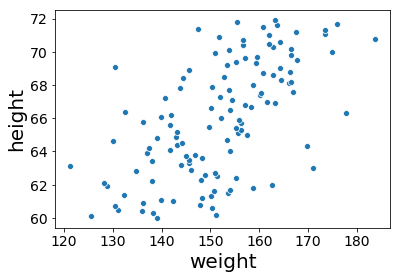

In [17]:
sns.scatterplot(people['weight'],people['height'])

# Reducing number of features

### Why does it make sense to reduce the height and weight variables into 1 feature?

In [18]:
from sklearn.linear_model import LinearRegression

In [19]:
# fit height to from weight
LR=LinearRegression()
LR.fit(people[['weight']],people[['height']])
height_pred=LR.predict(people[['weight']])

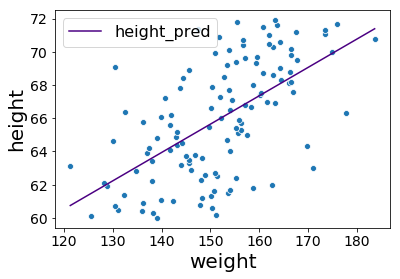

In [20]:
sns.scatterplot(people['weight'],people['height'])
sns.lineplot(people['weight'],height_pred[:,0],color='indigo',label='height_pred')

### Question: How can you create a new feature using linear regression?

![](https://i.stack.imgur.com/zoYKG.png)

In [21]:
# fit weight to from height
LR=LinearRegression()
LR.fit(people[['height']],people[['weight']])
weight_pred=LR.predict(people[['height']])

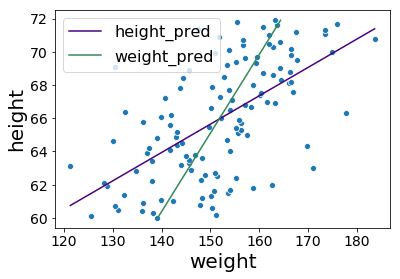

In [22]:
sns.scatterplot(people['weight'],people['height'])
sns.lineplot(people['weight'],height_pred[:,0],color='indigo',label='height_pred')
sns.lineplot(weight_pred[:,0],people['height'],color='seagreen',label='weight_pred')

![](https://i.imgur.com/5k0Hjn8.png)

# Minimizing Orthogonal Distance

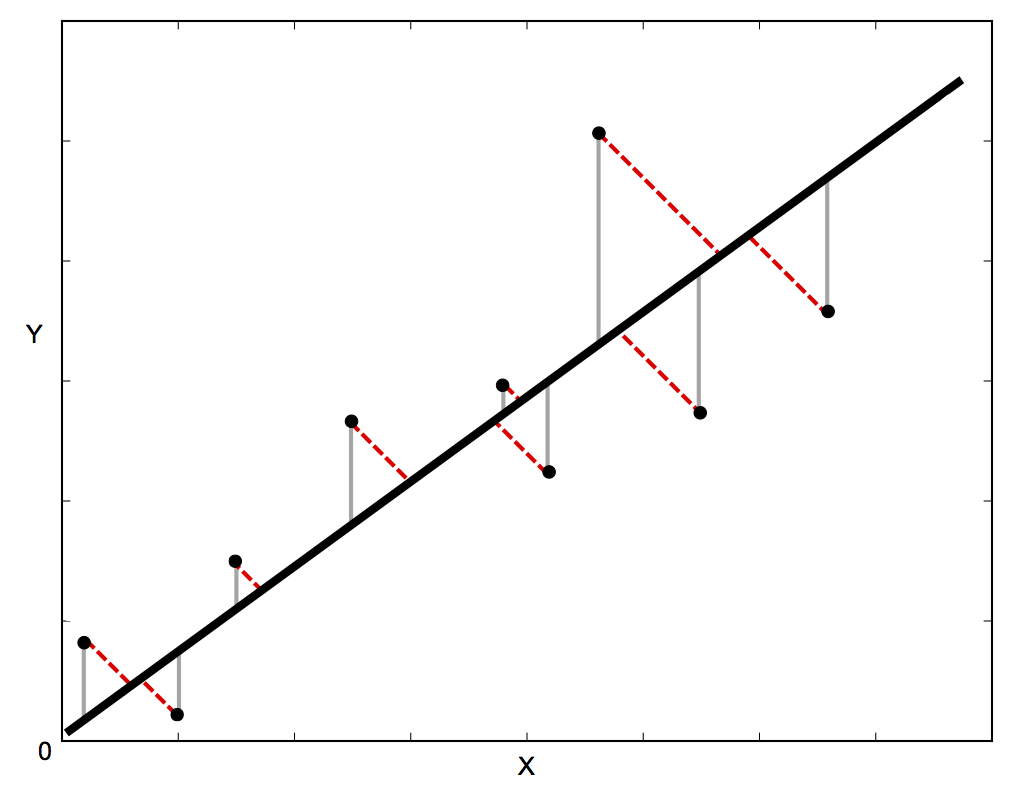

In [23]:
import requests
import IPython.display as Disp
url = 'http://blog.rtwilson.com/wp-content/uploads/2015/11/Normal_vs_ODR.png'
Disp.Image(requests.get(url).content,width=600, height=600)

### Question: What is the advantage of minimizing the orthogonal distance to create a best fit line for creating a new feature?

In [24]:
from scipy.odr import Model, Data, ODR
from scipy.stats import linregress
import numpy as np
def orthoregress(x, y):
    """Perform an Orthogonal Distance Regression on the given data,
    using the same interface as the standard scipy.stats.linregress function.
    Arguments:
    x: x data
    y: y data
    Returns:
    [m, c, nan, nan, nan]
    Uses standard ordinary least squares to estimate the starting parameters
    then uses the scipy.odr interface to the ODRPACK Fortran code to do the
    orthogonal distance calculations.
    """
    linreg = linregress(x, y)
    mod = Model(f)
    dat = Data(x, y)
    od = ODR(dat, mod, beta0=linreg[0:2])
    out = od.run()
    return list(out.beta)

def f(p, x):
    """Basic linear regression 'model' for use with ODR"""
    return (p[0] * x) + p[1]

In [53]:
# find orthogonal best fit line
ortho_m,ortho_b = orthoregress(people['weight'], people['height'])
ortho_pred = f([ortho_m,ortho_b],people['weight'])
ortho_pred.name = 'height'

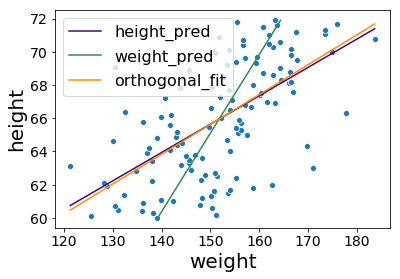

In [55]:
sns.scatterplot(people['weight'],people['height'])
sns.lineplot(people['weight'],height_pred[:,0],color='indigo',label='height_pred')
sns.lineplot(weight_pred[:,0],people['height'],color='seagreen',label='weight_pred')
sns.lineplot(people['weight'],ortho_pred,color='darkorange',label='orthogonal_fit')

### Question: What is the disadvantage of using the orthogonal best fit line for dimensionality reduction?

## Introducing Principal Component Analysis

Principal component analysis (PCA) is a fast and flexible unsupervised method for dimensionality reduction in data. PCA transforms data into a new form that contains the information of the original dataset. The PCA components (features) have no correlation to each other and the components are order from containing the highest amount of variance to the lowest amount of variance.

In [56]:
from sklearn.decomposition import PCA

In [57]:
pca = PCA(n_components=2)
pca_people=pca.fit_transform(people)

In [58]:
people.head(5)

,height,weight
0,60.0,139.080501
1,60.1,125.566493
2,60.2,151.217917
3,60.3,138.206748
4,60.4,135.888709


In [59]:
# points in PCA coordinates
pca_people[:5,:]

array([[-13.53780212,  -3.61092429],
       [-26.82075478,  -1.12063055],
       [ -1.55660993,  -5.56230855],
       [-14.34466241,  -3.16101332],
       [-16.6084063 ,  -2.65231739]])

In [67]:
# Use PCA component 1 to find the best fit line
pca=PCA(n_components=1)
pca_people=pca.fit_transform(people)
pca_fit=pca.inverse_transform(pca_people) 

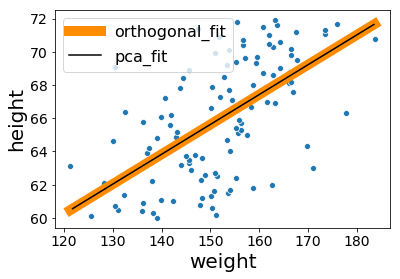

In [68]:
sns.scatterplot(people['weight'],people['height'])
sns.lineplot(people['weight'],ortho_pred,color='darkorange',label='orthogonal_fit',linewidth=10)
sns.lineplot(pca_fit[:,1],pca_fit[:,0],color='black',label='pca_fit')

### Question: Why is the orthogonal and PCA best lines the same?

# Visualizing PCA
The behavior of PCA is easiest to visualize by looking at a two-dimensional dataset.
Consider the following height and weight data:

The problem setting here is slightly different: rather than attempting to *predict* the y values from the x values, the unsupervised learning problem attempts to learn about the *relationship* between the x and y values.

In principal component analysis, this relationship is quantified by finding a list of the *principal axes* in the data, and using those axes to describe the dataset. We can compute this as follows:

In [87]:
pca = PCA(n_components=2)
pca_people=pca.fit_transform(people)

The fit learns some quantities from the data, most importantly the "components" and "explained variance":

In [88]:
print(pca.components_)

[[ 0.1769921   0.98421227]
 [ 0.98421227 -0.1769921 ]]


In [89]:
print(pca.explained_variance_)

[154.29757756   7.50143425]


To see what these numbers mean, let's visualize them as vectors over the input data, using the "components" to define the direction of the vector, and the "explained variance" to define the squared-length of the vector:

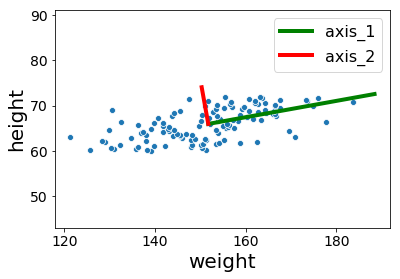

In [90]:
# plot height and weight data, draw PCA component vectors
sns.scatterplot(people['weight'],people['height'])
x_origin = people['weight'].mean()
y_origin = people['height'].mean()
x_axis1 = x_origin+pca.components_[0,1]*3*np.sqrt(pca.explained_variance_[0])
y_axis1 = y_origin+pca.components_[0,0]*3*np.sqrt(pca.explained_variance_[0])
x_axis2 = x_origin+pca.components_[1,1]*3*np.sqrt(pca.explained_variance_[1])
y_axis2 = y_origin+pca.components_[1,0]*3*np.sqrt(pca.explained_variance_[1])

plt.plot([x_origin, x_axis1],[y_origin, y_axis1], linewidth=4,color='green',label='axis_1')
plt.plot([x_origin, x_axis2],[y_origin, y_axis2], linewidth=4,color='red',label='axis_2')
ax = plt.gca()
ax.axis('equal')
ax.legend()


These vectors represent the *principal axes* of the data. The first direction principal axis representation is the direction of maximum variation through the data. The length of the vector is an indication of how "important" that axis is, or more precisely, it is a measure of the variance of the data when projected onto that axis. The following axis is added orthogonal to the first and positioned to represent the next highest variation through the data.

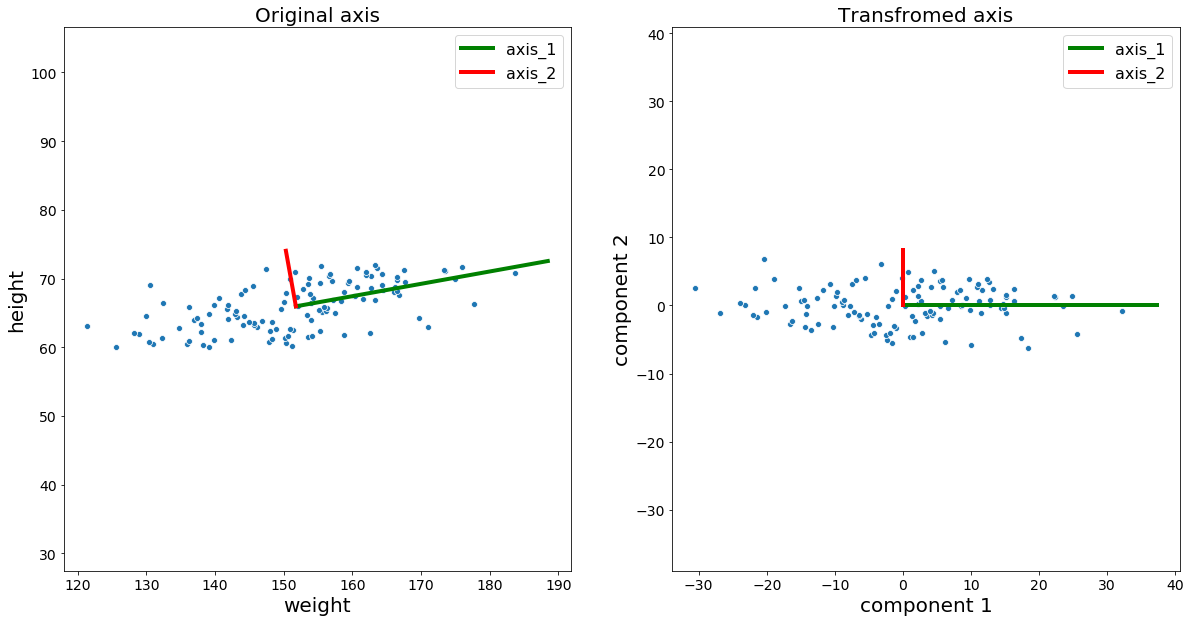

In [91]:
# PCA in original and transformed axes
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(20,10))

#subplot 1 original axis
sns.scatterplot(people['weight'],people['height'],ax=ax1)
ax1.plot([x_origin, x_axis1],[y_origin, y_axis1], linewidth=4,color='green',label='axis_1')
ax1.plot([x_origin, x_axis2],[y_origin, y_axis2], linewidth=4,color='red',label='axis_2')
ax1.title.set_text('Original axis')
ax1.axis('equal')
ax1.legend()

#subplot 2 transformed axis
x_trans_origin = pca_people[:,0].mean()
y_trans_origin = pca_people[:,1].mean()
x_trans_axis1 = x_trans_origin+3*np.sqrt(pca.explained_variance_[0])
y_trans_axis1 = y_trans_origin
x_trans_axis2 = x_trans_origin
y_trans_axis2 = y_trans_origin+3*np.sqrt(pca.explained_variance_[1])

sns.scatterplot(pca_people[:,0],pca_people[:,1],ax=ax2)
ax2.plot([x_trans_origin, x_trans_axis1],[y_trans_origin, y_trans_axis1], linewidth=4,color='green',label='axis_1')
ax2.plot([x_trans_origin, x_trans_axis2],[y_trans_origin, y_trans_axis2], linewidth=4,color='red',label='axis_2')
ax2.title.set_text('Transfromed axis')
plt.xlabel('component 1')
plt.ylabel('component 2')
ax2.axis('equal')
ax2.legend()

This transformation from data axes to principal axes is an *affine transformation*, which basically means it is composed of a translation, rotation, and uniform scaling.

### Question: What are some disadvantages of using the PCA components in a model?

While this algorithm to find principal components may seem like just a mathematical curiosity, it turns out to have very far-reaching applications in the world of machine learning and data exploration.

[Deep Dive on how the axes is determined](https://www.youtube.com/watch?v=_UVHneBUBW0)

[The linear algebra intuition behind this](https://www.youtube.com/watch?v=PFDu9oVAE-g)

### PCA for visualization: Hand-written digits

The usefulness of the dimensionality reduction may not be entirely apparent in only two dimensions, but becomes much more clear when looking at high-dimensional data.
To see this, let's take a quick look at the application of PCA to the digits data .

We start by loading the data:

In [78]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.data.shape

(1797, 64)

The data consists of 8×8 pixel images, meaning that they are 64-dimensional.
To gain some intuition into the relationships between these points, we can use PCA to project them to a more manageable number of dimensions, say two:

![MNIST](https://upload.wikimedia.org/wikipedia/commons/2/27/MnistExamples.png)

In [79]:
pca = PCA(2)  # project from 64 to 2 dimensions
projected = pca.fit_transform(digits.data)
print(digits.data.shape)
print(projected.shape)

(1797, 64)
(1797, 2)


We can now plot the first two principal components of each point to learn about the data:

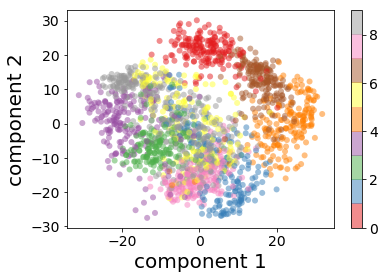

In [80]:
plt.scatter(projected[:, 0], projected[:, 1],
            c=digits.target, cmap='Set1', edgecolor='none', alpha=0.5,
            )
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar();

Recall what these components mean: the full data is a 64-dimensional point cloud, and these points are the projection of each data point along the directions with the largest variance.
Essentially, we have found the optimal stretch and rotation in 64-dimensional space that allows us to see the layout of the digits in two dimensions, and have done this in an unsupervised manner—that is, without reference to the labels.

### Choosing the number of components

A vital part of using PCA in practice is the ability to estimate how many components are needed to describe the data.
This can be determined by looking at the cumulative *explained variance ratio* as a function of the number of components:

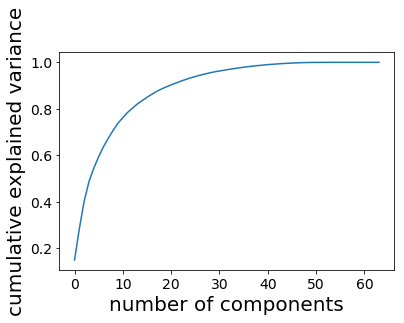

In [81]:
pca = PCA().fit(digits.data)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

### Question: How can we choose the amount of PCA components to use in a model?

This curve quantifies how much of the total, 64-dimensional variance is contained within the first $N$ components.
For example, we see that with the digits the first 10 components contain approximately 75% of the variance, while you need around 50 components to describe close to 100% of the variance.

Here we see that our two-dimensional projection loses a lot of information (as measured by the explained variance) and that we'd need about 20 components to retain 90% of the variance.  Looking at this plot for a high-dimensional dataset can help you understand the level of redundancy present in multiple observations.

## PCA as Noise Filtering

PCA can also be used as a filtering approach for noisy data.
The idea is this: any components with variance much larger than the effect of the noise should be relatively unaffected by the noise.
So if you reconstruct the data using just the largest subset of principal components, you should be preferentially keeping the signal and throwing out the noise.

Let's see how this looks with the digits data.
First we will plot several of the input noise-free data:

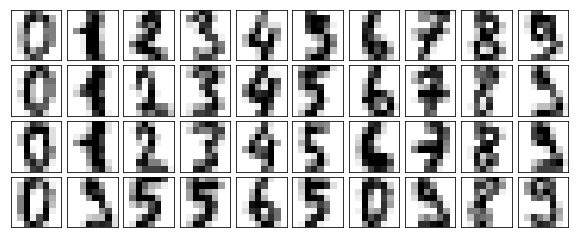

In [93]:
def plot_digits(data):
    fig, axes = plt.subplots(4, 10, figsize=(10, 4),
                             subplot_kw={'xticks':[], 'yticks':[]},
                             gridspec_kw=dict(hspace=0.1, wspace=0.1))
    for i, ax in enumerate(axes.flat):
        ax.imshow(data[i].reshape(8, 8),
                  cmap='binary', interpolation='nearest',
                  clim=(0, 16))
plot_digits(digits.data)

Now lets add some random noise to create a noisy dataset, and re-plot it:

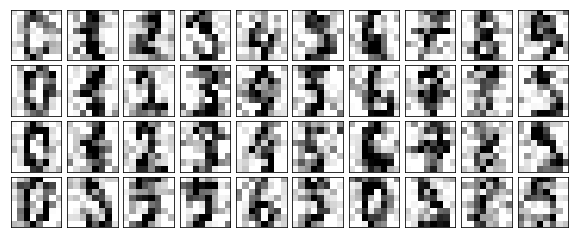

In [94]:
np.random.seed(42)
noisy = np.random.normal(digits.data, 4)
plot_digits(noisy)

It's clear by eye that the images are noisy, and contain spurious pixels.
Let's train a PCA on the noisy data, requesting that the projection preserve 50% of the variance:

In [95]:
pca = PCA(0.50).fit(noisy)
pca.n_components_

12

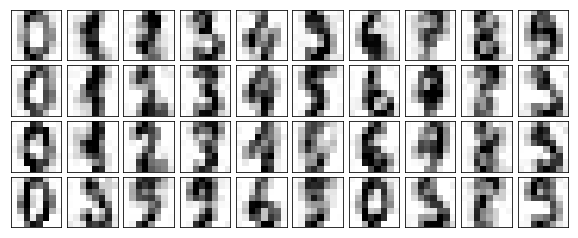

In [96]:
components = pca.transform(noisy)
filtered = pca.inverse_transform(components)
plot_digits(filtered)

This signal preserving/noise filtering property makes PCA a very useful feature selection routine—for example, rather than training a classifier on very high-dimensional data, you might instead train the classifier on the lower-dimensional representation, which will automatically serve to filter out random noise in the inputs.

## Principal Component Analysis Summary

We have discussed the use of principal component analysis for dimensionality reduction, for visualization of high-dimensional data, for noise filtering, and for feature selection within high-dimensional data.
Because of the versatility and interpretability of PCA, it has been shown to be effective in a wide variety of contexts and disciplines.
Given any high-dimensional dataset, I tend to start with PCA in order to visualize the relationship between points (as we did with the digits), to understand the main variance in the data, and to understand the intrinsic dimensionality (by plotting the explained variance ratio).
Certainly PCA is not useful for every high-dimensional dataset, but it offers a straightforward and efficient path to gaining insight into high-dimensional data.

PCA's main weakness is that it tends to be highly affected by outliers in the data.
For this reason, many robust variants of PCA have been developed, many of which act to iteratively discard data points that are poorly described by the initial components.
Scikit-Learn contains a variant on PCA called ``SparsePCA``, which introduces a regularization term that serves to enforce sparsity of the components.